In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

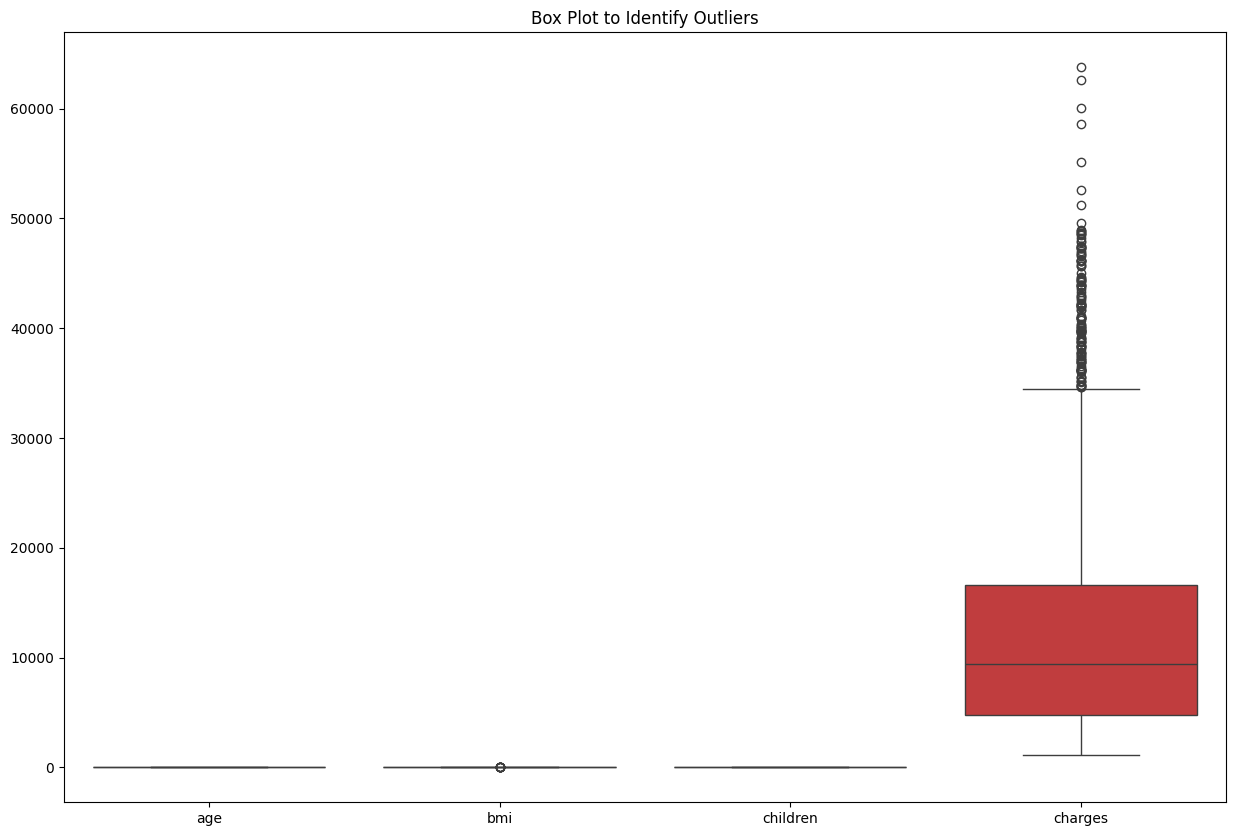

In [6]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)
plt.title('Box Plot to Identify Outliers')
plt.show()

In [7]:
# df["charges"].skew()

In [8]:
# plt.subplot(1,2,1)
# sns.distplot(df['charges'])
# plt.subplot(1,2,2)
# sns.distplot(df['bmi'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor ,plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_text

In [10]:
X = df.drop('charges', axis=1)
y = df['charges']

In [11]:
X = pd.get_dummies(X, drop_first=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
regressor = DecisionTreeRegressor( random_state=42)

In [14]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 42446908.010150984
R-squared: 0.7265877305258355


In [18]:
# tree_rules = export_text(regressor, feature_names=list(X.columns))
# print(tree_rules)

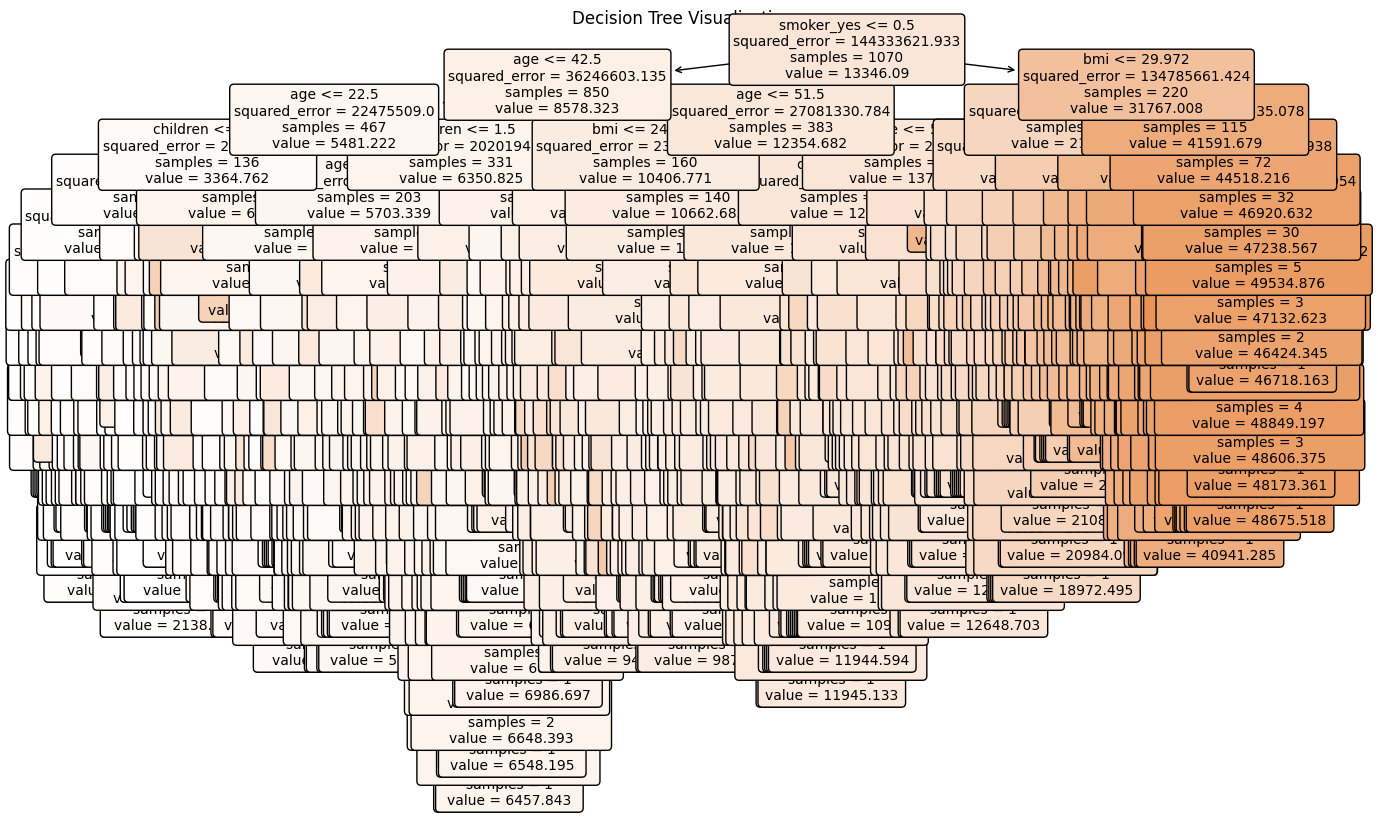

In [19]:
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=list(X.columns), rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [20]:
tree_rules = export_text(regressor, feature_names=list(X.columns), spacing=3, decimals=2, show_weights=True)
tree_df = pd.DataFrame([rule.split() for rule in tree_rules.split('\n') if rule.strip() != ''], columns=['Feature', 'Threshold', 'Weight'])
tree_df['Threshold'] = tree_df['Threshold'].astype(float)

ValueError: 3 columns passed, passed data had 17 columns